# Jul 21st, 2022 (Allen Ctx + parc top)

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Fig dir

In [2]:
fig_dir = pjoin(fig_base_dir, 'paper2.0')
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 1000,
}

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0

## Prepare (128)

In [3]:
nn = 128
mice = Mice(nn)

bt_dict, props_bo, props_ca = default_props(mice, mg=False)
bt = BootStrap(**props_ca)

### Plot ROI topview

In [4]:
top, _ = bt.load_top_flat()
top_parc, _ = mice.parcel.load_top_flat()
top, top_parc = filter_boundaries([top, top_parc], top > 0)

regions = np.unique(top_parc[top_parc.nonzero()])
hcl = mice.parcel.decode(regions)
x = np.zeros_like(top_parc)
for i, r in enumerate(regions):
    if hcl[i, 0] == 1:
        x[top_parc == r] = i + 1

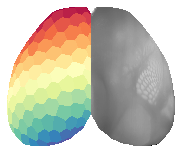

In [5]:
fig, ax = create_figure(1, 1, (3, 3.2), tight_layout=False, constrained_layout=False)
ax.imshow(mwh(top == 0, top), cmap='Greys_r', interpolation='none')
ax.imshow(mwh(x == 0, x), cmap='Spectral', interpolation='none')
remove_ticks(ax)
fig.savefig(pjoin(fig_dir, f'top_n{nn}.png'), **kws_fig)
plt.show()

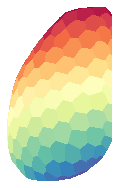

In [6]:
top = top[:, :top.shape[1]//2]
x = x[:, :x.shape[1]//2]

fig, ax = create_figure(1, 1, (3, 3.2), tight_layout=False, constrained_layout=False)
ax.imshow(mwh(top == 0, top), cmap='Greys_r', interpolation='none')
ax.imshow(mwh(x == 0, x), cmap='Spectral', interpolation='none')
remove_ticks(ax)
fig.savefig(pjoin(fig_dir, f'top_n{nn}_left.png'), **kws_fig)
plt.show()

## Prepare (512)

In [3]:
nn = 512
mice = Mice(nn)

bt_dict, props_bo, props_ca = default_props(mice, mg=False)
bt = BootStrap(**props_ca)

### Plot ROI topview

In [4]:
top, _ = bt.load_top_flat()
top_parc, _ = mice.parcel.load_top_flat()
top, top_parc = filter_boundaries([top, top_parc], top > 0)

regions = np.unique(top_parc[top_parc.nonzero()])
hcl = mice.parcel.decode(regions)
x = np.zeros_like(top_parc)
for i, r in enumerate(regions):
    if hcl[i, 0] == 2:
        x[top_parc == r] = i + 1

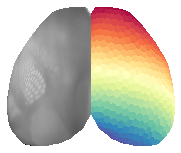

In [5]:
fig, ax = create_figure(1, 1, (3, 3.2), tight_layout=False, constrained_layout=False)
ax.imshow(mwh(top == 0, top), cmap='Greys_r', interpolation='none')
ax.imshow(mwh(x == 0, x), cmap='Spectral', interpolation='none')
remove_ticks(ax)
fig.savefig(pjoin(fig_dir, f'top_n{nn}.png'), **kws_fig)
plt.show()

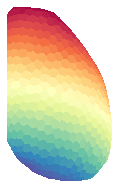

In [6]:
top = top[:, top.shape[1]//2:]
x = x[:, x.shape[1]//2:]

fig, ax = create_figure(1, 1, (3, 3.2), tight_layout=False, constrained_layout=False)
ax.imshow(mwh(top == 0, top), cmap='Greys_r', interpolation='none')
ax.imshow(mwh(x == 0, x), cmap='Spectral', interpolation='none')
remove_ticks(ax)
fig.savefig(pjoin(fig_dir, f'top_n{nn}_right.png'), **kws_fig)
plt.show()

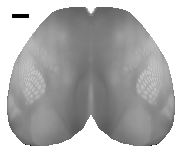

In [20]:
top, _ = bt.load_top_flat()
top_parc, _ = mice.parcel.load_top_flat()
top, top_parc = filter_boundaries([top, top_parc], top > 0)

fig, ax = create_figure(1, 1, (3, 3.2), tight_layout=False, constrained_layout=False)
ax.imshow(mwh(top == 0, top), cmap='Greys_r', interpolation='none')

rect = Rectangle(
    xy=(30, 40),
    width=100,
    height=20,
    color='k',
)
ax.add_patch(rect)

remove_ticks(ax)
fig.savefig(pjoin(fig_dir, f'top_1mm.png'), **kws_fig)
plt.show()

In [11]:
top.shape
scape = np.zeros_like(top)

(857, 1034)

In [21]:
fig_dir

'/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0'

## Make coarse + fine contour

In [5]:
contour_fine = bt.get_contour(0.1, False)
contour_coarse = bt.get_contour(0.1, True)

top = filter_boundaries(bt.topview, bt.topview > 0)

contour = np.zeros_like(top)
contour[:, :top.shape[-1] // 2] = contour_coarse[:, :top.shape[-1] // 2]
contour[:, top.shape[-1] // 2:] = contour_fine[:, top.shape[-1] // 2:]

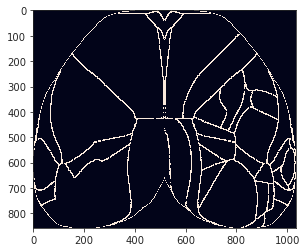

In [6]:
plt.imshow(contour);

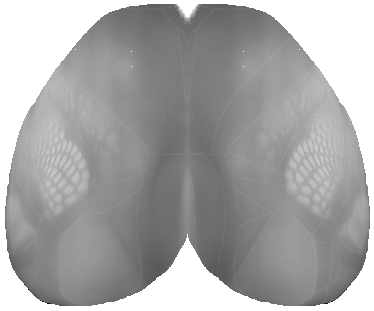

In [7]:
fig, ax = create_figure(figsize=(10, 8), dpi=50, tight_layout=False, constrained_layout=False)
ax.imshow(mwh(top == 0, top), cmap='Greys_r')
ax.imshow(
    X=mwh(contour == 0, contour),
    cmap='Greys_r',
    vmin=0,
    vmax=1,
    alpha=0.05,
    interpolation='none',
)
remove_ticks(ax)
fig.savefig(pjoin(fig_dir, 'allen.png'), **kws_fig)

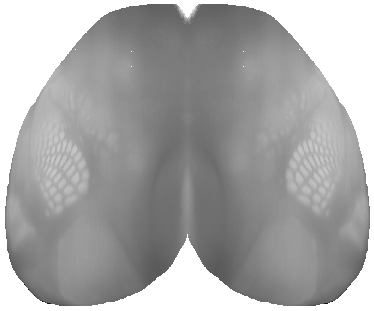

In [8]:
fig, ax = create_figure(figsize=(10, 8), dpi=50, tight_layout=False, constrained_layout=False)
ax.imshow(mwh(top == 0, top), cmap='Greys_r')
remove_ticks(ax)
fig.savefig(pjoin(fig_dir, 'allen_raw.png'), **kws_fig)

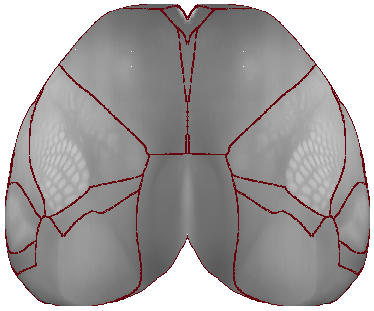

In [10]:
fig, ax = create_figure(figsize=(10, 8), dpi=50, tight_layout=False, constrained_layout=False)
plt.imshow(mwh(top == 0, top), cmap='Greys_r')
plt.imshow(
    X=mwh(contour_coarse == 0, contour_coarse),
    cmap='Reds',
    vmin=0,
    vmax=1,
    alpha=1.0,
    interpolation='none',
)
remove_ticks(ax)

---
---
## Old stuff

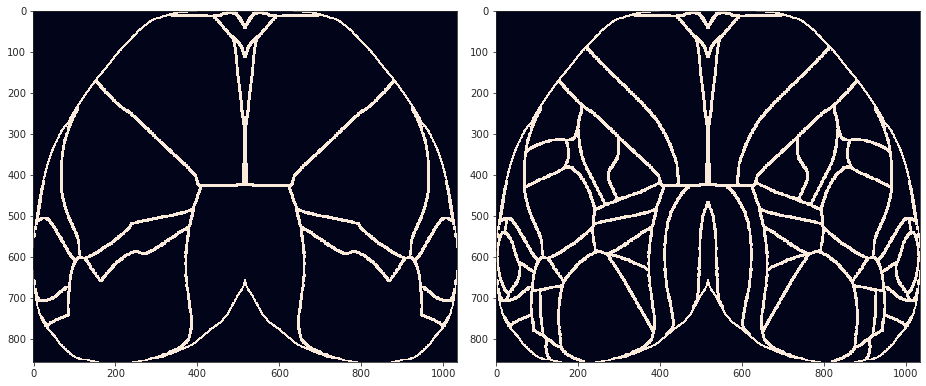

In [189]:
fig, axes = create_figure(1, 2, (13, 15))
axes[0].imshow(contour_coarse)
axes[1].imshow(contour_fine);

In [144]:
contour = contour_fine.copy().astype(float)
contour[contour_coarse] = 2

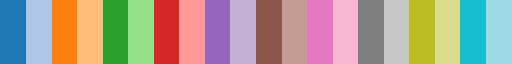

In [145]:
sns.color_palette('tab20', as_cmap=True)

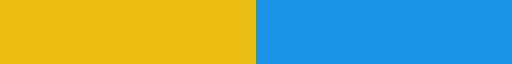

In [166]:
# colors = sns.color_palette('tab20', n_colors=20)
colors = ['#EDBC12', '#1995E6'] # ['#2F52D0', '#D0AD2F']
cmap = matplotlib.colors.ListedColormap(colors)
cmap

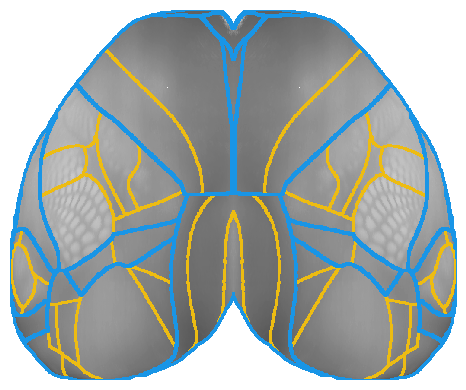

In [169]:
fig, ax = create_figure(dpi=100)
plt.imshow(mwh(top == 0, top), cmap='Greys_r')
plt.imshow(mwh(contour == 0, contour), cmap=cmap, interpolation='none')
remove_ticks(ax)

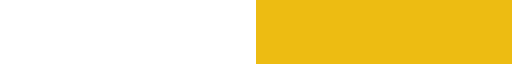

In [191]:

cmap_fine

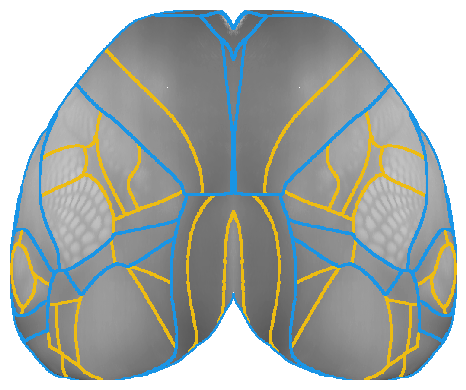

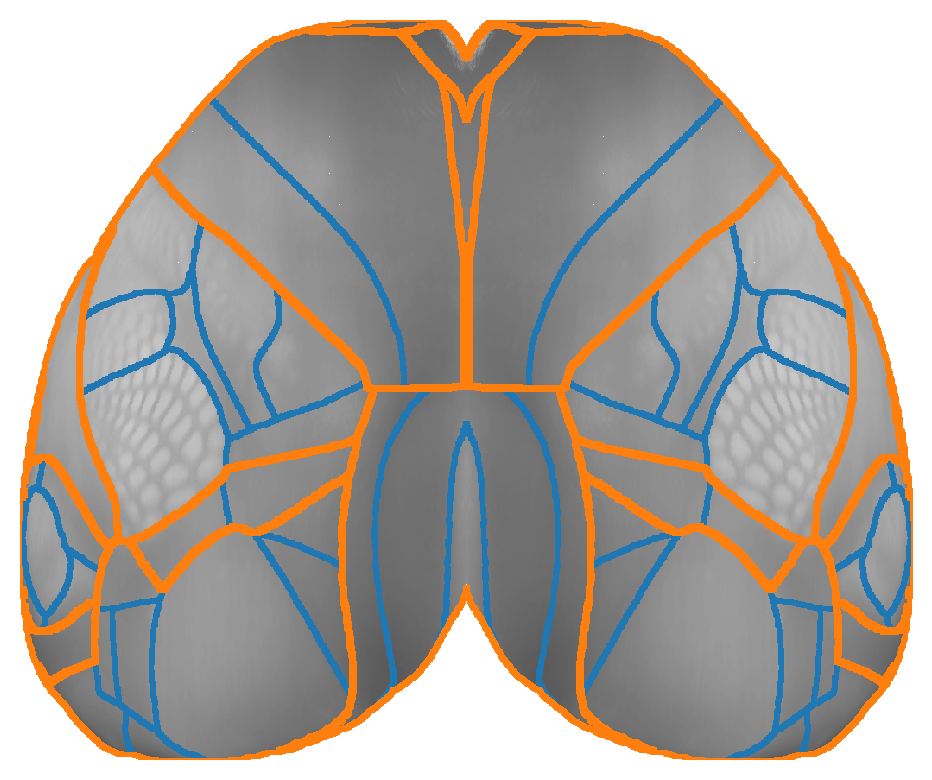

In [57]:
fig, ax = create_figure(dpi=200)
plt.imshow(mwh(top == 0, top), cmap='Greys_r')
plt.imshow(mwh(contour == 0, contour), cmap=cmap, interpolation='none')
remove_ticks(ax)